# CFD Results Post-Process & Validation

**The final step for the development of a CFD simulation for a problem of interest is to process and examine the validity of the obtained numerical results (a.k.a post-processing and validation step). These steps requires an in-depth engineering knowledge about the fundamentals of the physical problem of interest. Thus, the value of investing time in understanding the fundamental physics of the flow, once again is highlighted here. This process is done starting from general inspection on CFD simulation results and ends with more detail validation process.**

The obtained results for 2D laminar unsteady flow over a cylinder with Reynolds of 200 (Re=200) is post-processed and discussed in this section. The first general rule of thumb to check the convergence of a CFD simulation is to check the residual and error values for key flow variables, such as continuity, velocity and pressure. In OpenFoam the residual values for velocity components and pressure along with error values for continuity are printed out at each time step as set in the `controlDict` dictionary file. A sample of time report is shown below for the last time step `t=225`:

```C++
Time = 225

Courant Number mean: 0.00310746 max: 0.278689
smoothSolver:  Solving for Ux, Initial residual = 6.22043e-06, Final residual = 6.22043e-06, No Iterations 0
smoothSolver:  Solving for Uy, Initial residual = 0.00015215, Final residual = 1.92191e-07, No Iterations 1
DICPCG:  Solving for p, Initial residual = 0.00945612, Final residual = 9.72329e-07, No Iterations 444
time step continuity errors : sum local = 1.12659e-14, global = -9.69557e-17, cumulative = -9.54722e-13
DICPCG:  Solving for p, Initial residual = 0.00733813, Final residual = 9.67258e-07, No Iterations 443
time step continuity errors : sum local = 1.12149e-14, global = 9.69875e-17, cumulative = -9.54625e-13
ExecutionTime = 562398 s  ClockTime = 580882 s

forceCoeffs forceCoeffs1 output:
    Coefficients
        Cm       : 0.00458448	(pressure: 5.25664e-13	viscous: 0.00458448)
        Cd       : 1.30544	(pressure: 1.06474	viscous: 0.240702)
        Cl       : -0.52007	(pressure: -0.490405	viscous: -0.0296648)
        Cl(f)    : -0.25545
        Cl(r)    : -0.264619
```

The residual value of each variable denotes how the numerical value of it is differing from the previous time step. Lower value of residual indicates the obtained numerical value of the variable has converged to a specific value. In this simulation this is true for `U_x`, `U_y` and `p` that have residual values by order of at least `1e-6`. The reported `continuity errors` defines how the obtained relevant variables are satisfying the continuity equation. The global continuity error with order of `1e-17` in this problem confirms that continuity equation is being satisfied. Furthermore, with the previously setup function inside the `controlDict` file at each time step of the simulation the values for lift and drag coefficients are calculated and reported along with the residual values. The post processing of these data will be discussed later in this section.

Once the simulation is ran in OpenFoam the user can plot the trend and temporal evolution of different variables at the end of the simulations. Running the command `foamJob icoFoam` before starting the iterations would make a file called `log` inside the working directory. In the end of simulation running the command `foamLog log` inside the main working directory would read the generated `log` file and make a history of flow field variables' residuals inside a new directory called `logs`. Changing the directory into `logs` directory and running `gnuplot` command, user can plot the obtained numerical residuals. This process was done for simulation with $Re=200$ and generated log files were visualized using the following commands:

```C++
gnuplot
gnuplot> set xlabel "Iterations"          #sets label of x-axis
gnuplot> set ylabel "Residuals"           #sets label of y-axis
gnuplot> set yrange [-0.000001:0.000011]  #sets range of y-axis
gnuplot> plot './contLocal_0' with lines, './UxFinalRes_0' with lines, './pFinalRes_0' with lines #plots residuals
```   

<img src="./Images/residuals_Re200.png" width="500" align="middle">
</br>
Fig. 1 The residual values of `U_x` and `p` with the continuity error values versus time steps.

As shown in Fig. 1 the residuals of pressure and continuity error are significantly low (order of 1E-6) and almost constant from the beginning of the iterations. On the other hand the residuals of the streamwise velocity first increases, then start to have significant fluctuation after 80 seconds and then start to decreases monotonically after 95 seconds with minor fluctuations. These fluctuations correspond to initial wake separation following by the velocity fluctuations due to the unsteadiness of the flow in the wake of the cylinder. It should be noted that despite the fact of fluctuating values, which can be a sign of divergence of a CFD simulation, the fluctuation range is significantly small (order of 1E-5). This confirms that the numerical solution of the conservation/governing equations are converging to specific final values. This low value of residuals is the first necessary, but not sufficient, general criteria to confirm the convergence of the CFD simulation.

The second step of post-processing is to visualize dimensionless form of the important flow field variables within the CFD domain. This visualization step can be problem specific and should be performed over an adequate plane of choice, which will be explained for the current case study shortly. To post-process the obtained numerical results in OpenFoam it is recommended to use the post-processor package of OpenFoam called `ParaView`. `ParaView` can be launched running the command

```C++
paraFoam
```

in the terminal, while locating in the working directory of the simulation. Running this command will simply read all the obtained numerical results and get it ready for post-processing. Once the user runs `paraFoam` command and the software loads up, all the boundaries and fields should be activated (i.e. checked in their box) and the `Apply` bottom under `Properties` window should be hit to load the numerical results.

For most of the problems visualization of normalized velocity or pressure contours over a horizontal or vertical plane at the center of the CFD domain is a good start point for post-processing the obtained numerical data. For the current problem, since the entire domain is two dimensional and planar, the entire domain itself is the best candidate of post-processing plane. User should now define the normalized variable of interest needs to be visualized. Defining variables can be done following path of `Filters/Data Analysis/Calculator`. This command will open a new panel under `Properties`, where users can define their variable of interest; Name the variable (i.e. `U_X`) and enter the required formula/definition for the normalized variable of interest (i.e. `U_x/1`) and hit `Apply`. This will calculate the normalized streamwise velocity with free stream velocity within the entire CFD domain for all the time steps and visualize the results for `t=0`. Using the `play` bottom users can see the formation of laminar boundary layer and wake around and in the back of the rotating cylinder:

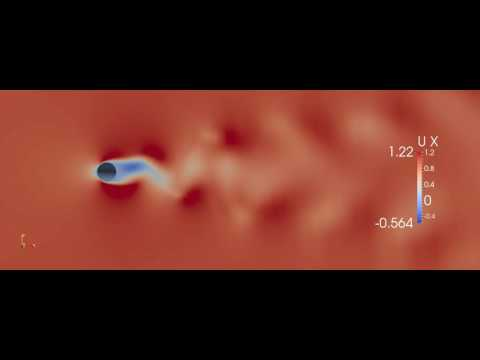

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("sbIO9kQLsT8")

Fig. 2 - Animation for the temporal evolution of the normalized streamwise velocity contours with the free stream velocity for flow over a cylinder with $Re=200$.

Fig. 2 visualizes the temporal evolution of the normalized streamwise velocity with free stream for flows with $Re=200$. The Flow enters the domain with normalized velocity of 1. Due to the imposed no-slip boundary conditions over the surface of cylinder, the velocity instantly decrease to zero on the nose of the cylinder and a laminar boundary layer starts to form and grow around the cylinder's surface. After first few time steps an attached wake form right after the cylinder and expands symmetrically. However, due to the dominance of the inertial forces over the viscous forces within the flow with Reynolds of 200, the attached laminar boundary layer and wake of the cylinder gets separated from the flow and the flow field becomes unsteady. Vortices start to shed from the top and bottom of the cylinder in to it's wake. The symmetric pattern of the shed vortices in the wake of the cylinder is referred to as the von-Karman vortex street. 

In order to obtain a better visualization for the path of shed vortices into the wake of the cylinder users should calculate the vorticity field at different time steps by closing the open `ParaView` session and running the following command, while locating in the working directory:

```C++
vorticity
```

Execution of the `vorticity` command will calculate and save vorticity field, as the curl of the velocity field, data for all of the time steps. Now again by running `paraFoam` and loading the variables, including the calculated vorticity data, user can choose the vorticity field from the drop down list and visualize it within the CFD domain. Fig. 3 shows vorticity magnitude contours, normalized with the maximum vortex magnitude, in the flow field around a cylinder with Reynolds 200. The physics of the visualized flow is exactly the same the one explained for the velocity field. The only difference is that in the regions of high velocity the formation and path of the vortices being shed from the cylinder wall and diffusing in the wake of it is more visible.

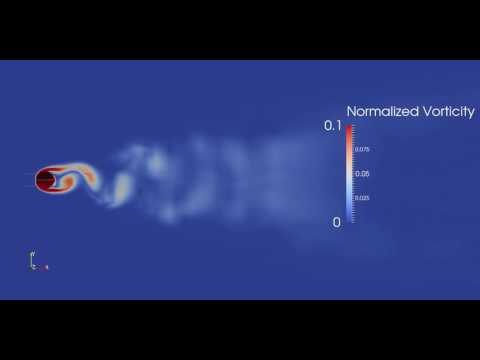

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("70eZrwBobcg")

Fig. 3 - Temporal evolution of the vorticity magnitude field for flow over a cylinder with Re=200.

**After performing the general post-processing steps, the user need to perform more detail oriented post-processing to confirm the validity of the CFD simulation. This stage can be a state-of-the-art. Comparing the numerical results against the theory (discussed earlier) or any other available experimental results is the final stage of post-processing. It is extremely important to calculate the correct corresponding numerical variables and compare them against the experimental or other numerical data.**

In order to validate the numerical results from these simulations the numerically predicted drag coefficients of the cylinder were compared against the corresponding experimentally validated drag coefficient values from [here](https://www.researchgate.net/publication/232025673_Computations_of_the_drag_coefficients_for_low-Reynolds-number_flow_past_rings) for different Reynolds numbers. The reason behind choosing the drag coefficient is that the cylinder is significantly affected by the pressure forces acting on the body of cylinder and generating a wake behind the object. It is worth to mention that in the laminar flows the effect of viscous forces on the drag force and coefficient on the cylinder is minimum.

The value of the drag coefficient of the cylinder is defined as:

$$ C_D~=~\frac{F_D}{\frac{1}{2} . \rho_{ref} . V_{ref} ^2 . A_{proj}}. $$

In this equation $F_D$, the total drag force due to pressure and viscous forces within the flow acting on the cylinder's surface in the streamwise direction, is normalized with the available momentum within the undisturbed incoming flow that could be exerted on the cylinder. The value of this momentum is calculated using $\rho_{ref}$ as the reference density of the flow, which is the density of the flow. $V_{ref}$ as the undisturbed streamwise flow velocity in the inlet and $A_{proj}$, which is the projected area of the cylinder surface. For a two-dimensional cylinder the projected area is equal to the diameter of the cylinder. This is the area where pressure and viscus forces are acting on the cylinder in the streamwise direction. It should be noted that the pressure and viscous forces in the perpendicular direction to streamwise direction cancel each other. Hence, the forces and areas that they act on does not have any contribution to the drag force and coefficient.

As discussed earlier in the "Simulation Setup" section user can take advantage of pre-written functions and libraries to calculate and report drag force coefficient values. The "forceCoeffs" function, added to `controlDict` dictionary file located in `\system folder`, takes "cylinder" walls as the patch and calculate the forces on in the defined directions. The three available directions are `liftDir`, `dragDir` and `pitchAxis`. Based on the orientation of coordinates in the current CFD-domain the drag force direction is along x-axis (1 0 0), the lift force direction is along y-axis (0 1 0) and pitchAxis is along z-direction (0 0 1). The center of origin called `CodR` is located at (0 0 0). Reference variables are defined as the free stream flow properties. In this case study reference values of velocity, density and diameter are all equal to 1. However, the value of reference area "Aref" should be defined differently! Fundamentally, the reference area to calculate the drag force coefficient is defined as the total "effective" area that the force of interest is acting against. In case of the flow over a cylinder the fluid forces on the body of cylinder can be visualized as shown in the Fig. 3:

<img src="./Images/Aref_viz.png" width="400">
Fig. 4 - Schematic of total fluid force and it's decomposition on the body of cylinder.

Each force component can be decomposed into two components in the horizontal and vertical directions shown with red and green colors respectively. Due to the symmetry of the geometry the vertical components of the forces cancel each other. Therefore, the total drag force is the summation of all horizontal forces that are acting against the projected area along the cylinder's wall as visualized in the zoom-in view of Fig. 1. This area is defined as the reference area `Aref` and is equal to diameter times the depth of the cylinder. For the current CFD domain the diameter is 1 [m] and the created depth of the mesh via "blockMesh" is 2.8 [m]. Therefore, the value of the reference area is 2.8 $[m^2]$. Note that for a purely 2D problem (with no depth in mesh) the value of depth is considered to be unity. Therefore, in that case the value of the reference area is 1 $[m^2]$. 

Correct setup of the "forceCoeffs" function will calculate and write the desired variables, such as lift and drag coefficient of the cylinder, and put it in the path of `postProcessing/forceCoeffs1/[iteration start time]` while performing iterations. The stored data in the `.dat` file can be visualized via `gnuplot` using the following command as follows:

```C++
gnuplot
gnuplot> set xlabel "Time [sec]"          #sets label of x-axis
gnuplot> set ylabel "Cd [-]"              #sets label of y-axis
gnuplot> plot "coefficient_30.001.dat" using 1:3 #plot the first and third column of the .dat file
```

<img src="./Images/Cd_Re200.png" width="500">
Fig. 5 Temporal evolution of the cylinder's drag coefficient for the flow field with Reynolds of 200.

As shown in Fig. 5 the drag coefficient of the cylinder initially increases. This is due to the formation of the laminar boundary layer and wake around and in the back of the cylinder respectively. This would increase the pressure gradient across the cylinder and therefore the magnitude of the force in the streamwise direction from the flow over cylinder. After about 80 seconds the values of the drag coefficient starts to fluctuate within a finite range around a fix mean value. The reason behind these fluctuations is the periodic vortex generation and shedding from the cylinder wall and unsteadiness of the flow. The final value of the drag coefficient will therefore be the mean of the fluctuating values as reported and compared against experimental values in Table 1.  


| Reynolds #     | $C_D$ Exp. Validated| $C_D$ Numerical   |Relative Error [%]|
| :-------------:|:-------------------:|:-----------------:|:----------------:|
| 100            | 1.41                |     -             |                  |
| 200            | 1.31                |     1.32          |    0.76          |
| 300            | 1.29                |     1.33          |    3.10          |
| 400            | 1.15                |     1.37          |    19.13         ||

Table 1. Comparison between the experimentally validated and numerically predicted a cylinder drag coefficient for different Reynolds number.

Table 1 compares the experimentally [validated](https://www.researchgate.net/publication/232025673_Computations_of_the_drag_coefficients_for_low-Reynolds-number_flow_past_rings) and numerically calculated drag coefficient values for case study of laminar unsteady flow over a cylinder and states the corresponding value of the relative error percentage. As shown in this table the value of the relative error percentage are below 1% for cases up to the Reynolds number below 200. The numerical and experimental values are in a close agreement with each other for each corresponding Reynolds number. However, for Reynolds number of 300 and above the level of agreement between the previously experimentally validated data and current numerical data decreases significantly. The hypothesis behind this disagreement is that for flow with higher Reynolds number the flow field becomes three-dimensional. Hence, two-dimensional simulations are limited to capture and simulates the flow three-dimensionality behavior and the drag force inserted on the cylinder. As a result of this the relative error between the obtained numerical values and previously validated experimental results start to grow. This hypothesis is also addressed and investigated by [Rajani et. al.](http://www.sciencedirect.com/science/article/pii/S0307904X08000243) as well.

As further validation steps for current case study user can also investigate the temporal evolution for the lift coefficient of the cylinder and/or compare the value of Strouhal number (Sr), the non-dimensional form of vortex shedding frequency in the wake of the cylinder, as a function of Reynolds number. It is expected that the level of agreement of these variables against their corresponding experimentally validated variables will be very good for flow with Reynolds number below 200. This agreement will however decrease as the Reynolds number and therefore the three-dimensionality of the flow increases.

<As the last step for post-processing and validation of the CFD simulations the value of the Strouhal number should be estimated and compared against the experimental data. The Strouhal number is a dimensionless form of the vortex shedding frequency defined as

$$ St=\frac{f * D}{U}.$$

In this formulation $f$ is the vortex shedding frequency, $D$ is the length scale of the flow and $U$ is the free stream of the flow. In this formula the length scale $D$ is the diameter of the cylinder with magnitude of $ 1 \frac{m}{s} $. $U$ is the magnitude of the free stream velocity with magnitude of $ 1 \frac{m}{s} $. However, $f$ is unknown and should be estimated using the numerical data. If a user visualizes the temporal evolution of the lift coefficient using the the same approach that was used for drag coefficient the results of this visualization is shown in Fig. 6.>

<Fig. 6 Temporal evolution of the cylinders lift coefficient for the flow field with Reynolds of 200.
Fig. 6 shows that the value of lift coefficient is almost zero during the first few time steps . Once the laminar wake gets separated from the cylinder and vortices start to be shed into the wake of cylinder periodically the value of lift coefficient also periodically fluctuates around the mean value of zero. Taking the Fourier Transform of the lift coefficient data the frequency of vortex shedding $f$ and therefore the Strouhal number can be estimated for the flow. Table 2 shows the comparison between the numerically estimated values of Strouhal number compared against the coresponding experimental values for flow with different Reynolds number as follows:>

At this stage one can conclude that this CFD numerical simulation is validated to study unsteady laminar flow over a cylinder using the provided numerical setup and methodology. Therefore, these simulations can be used for similar or more complex problems, such as unsteady flow over a cylinder or three dimensional laminar steady or unsteady flow over a sphere. This can be done via correct implementation in changing the corresponding solver, models and/or boundary conditions.